In [21]:
import numpy as np
import pandas as pd

data = pd.read_csv("example1.txt", delimiter=" ", header=None).iloc[:, :5]

data.columns = ["x_1", "x_2", "y_1", "y_2", "d"]

d = data["d"]
coordinates = data.iloc[:, :4]


print(d)

0         3.462200
1         3.075776
2         1.441302
3         1.484704
4         0.275146
            ...   
119995    1.220381
119996    1.453581
119997    1.785060
119998    3.447458
119999    2.142716
Name: d, Length: 120000, dtype: float64


In [24]:
from pysr import PySRRegressor

model = PySRRegressor(
    maxsize = 30,
    niterations =100,
    binary_operators = ["+", "*", "/", "-"],
    unary_operators = [ "sqrt", "square", "exp", "log", "sin"],
    elementwise_loss = "loss(prediction, target) = (prediction - target)^2",
    batching = True
)

model.fit(coordinates, d)

print(model)

C:\Users\Vartotojas\miniconda3\envs\pydata-book\Lib\site-packages\pysr\sr.py:2774: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!



Expressions evaluated per second: 1.480e+02
Progress: 30 / 3100 total iterations (0.968%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           9.799e-01  1.594e+01  y = 2.0696
7           9.799e-01  6.358e-07  y = (square(square(-1.1199)) - -0.81551) + -0.31845
9           9.756e-01  2.179e-03  y = exp(exp(y_1 - 1.2294) * -0.73383) + 1.8763
10          9.748e-01  8.286e-04  y = exp((square(y_1) - 0.50654) * sin(-0.80699)) + 1.8763
───────────────────────────────────────────────────────────────────────────────────────────────────
════════════════════════════════════════════════════════════════════════════════════════════════════
Press 'q' and then <enter> to stop execution early.

Expressions evaluated per second: 3.130e+02
Progress: 83 / 3100 total iterations (2.677%)
═════════════════

[ Info: Final population:
[ Info: Results saved to:


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           9.798e-01  1.594e+01  y = 2.0809
6           9.343e-01  9.508e-03  y = sqrt(x_2 + (x_1 / x_2))
7           5.065e-01  6.123e-01  y = sqrt(2.024 + square(x_1 - x_2))
10          2.530e-14  5.314e+00  y = sqrt(square(y_1 - y_2) + square(x_1 - x_2))
12          2.530e-14  4.888e-05  y = sqrt((square(x_1 - x_2) + 8.586e-10) + square(y_2 - y_...
                                      1))
19          2.530e-14  7.400e-06  y = sqrt(square(y_2 - (y_1 + square(square(square(y_2) + -...
                                      0.63549) * -4.1664e-07))) + square(x_2 - x_1))
21          2.529e-14  1.873e-04  y = sqrt(square(y_1 + (((1.2817e-07 / square(y_2 + (x_1 + ...
                                      0.51216))) * x_2) - y_2)) + square(x_2 - x_1))
──────────────────────────────────────────────────────────────────────────────────────────────────

In [ ]:
import sympy

best_equation = model.sympy()

best_equation.simplify()

In [52]:
data_1 = pd.read_csv("feynman-i.44.4.txt", delimiter=" ", header=None)

data_1.columns =  [ "n", "T", "x_0", "V_2", "x_1", "V_1", "Q"]
darbas = data_1.iloc[:, 6]

kintamieji = data_1.iloc[:, [0, 1, 3, 5]]

print(kintamieji)

                 n           T       V_2       V_1
0     4.239597e+25   18.003548  0.000313  0.000316
1     6.004520e+24  100.384056  0.000677  0.000033
2     1.716892e+25   11.293581  0.000087  0.000342
3     3.424484e+24  317.072968  0.000581  0.000211
4     2.044623e+25  354.993988  0.000012  0.000890
...            ...         ...       ...       ...
7995  2.430448e+24   88.441658  0.000236  0.000035
7996  2.170220e+24  102.845459  0.000166  0.000688
7997  3.194065e+24  593.421631  0.000130  0.000022
7998  1.166901e+24  362.447205  0.000509  0.000083
7999  3.300775e+25  897.399475  0.000442  0.000898

[8000 rows x 4 columns]


In [57]:
model_Q = PySRRegressor(
    maxsize = 35,
    niterations =1000,
    binary_operators = ["*", "/"],
    unary_operators = [ "log"],
    elementwise_loss = "loss(prediction, target) = (prediction - target)^2",
    batching = True
)

model_Q.fit(kintamieji, darbas)

print(model_Q)

C:\Users\Vartotojas\miniconda3\envs\pydata-book\Lib\site-packages\pysr\sr.py:2774: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!



Expressions evaluated per second: 8.160e+03
Progress: 916 / 31000 total iterations (2.955%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           8.173e+10  1.594e+01  y = -5273.6
3           7.814e+10  2.247e-02  y = -1.6771 / V_2
5           7.315e+10  3.302e-02  y = T * (-0.0086203 / V_2)
7           6.700e+10  4.384e-02  y = T * ((-32.455 / V_2) * V_1)
9           6.700e+10  2.384e-05  y = ((T / 0.01245) / V_2) * (V_1 * -0.40608)
10          4.894e+10  3.141e-01  y = (log(1.0212 / (V_1 / V_2)) * T) * 235.25
───────────────────────────────────────────────────────────────────────────────────────────────────
════════════════════════════════════════════════════════════════════════════════════════════════════
Press 'q' and then <enter> to stop execution early.

Expressions evaluated per 

[ Info: Final population:
[ Info: Results saved to:



Expressions evaluated per second: 1.050e+04
Progress: 29080 / 31000 total iterations (93.806%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           8.173e+10  1.594e+01  y = -3571.9
3           7.797e+10  2.355e-02  y = V_1 * -1.8789e+08
5           7.226e+10  3.798e-02  y = n * (V_1 * -8.9335e-18)
6           6.689e+10  7.728e-02  y = log(V_1 / V_2) * -64658
7           6.083e+10  9.499e-02  y = n * ((V_1 * T) * -3.9738e-20)
8           4.746e+10  2.482e-01  y = log(V_1 / V_2) * (T * -296.02)
10          2.200e+01  7.969e+00  y = (n * log(V_1 / V_2)) * (T * -1.3806e-23)
14          2.197e+01  3.351e-04  y = T * (((log(V_1 / V_2) * (T * -1.3806e-23)) / T) * n)
16          5.102e-04  5.333e+00  y = (((n * 1.6228e-21) * (V_1 / (V_1 * -117.54))) * log(V_...
                               

In [ ]:
equation = model_Q.sympy().simplify()

equation

In [ ]:
data_2 = pd.read_csv("feynman-i.12.4.txt", delimiter=" ", header=None)

data_2.columns = ["q1", "q2", "r", "F"]

X = data_2.iloc[:, :3]
F = data_2["F"]

print(X)

In [64]:
model_F = PySRRegressor(
    maxsize = 40,
    niterations =1000,
    binary_operators = ["+", "*", "/", "-"],
    unary_operators = [ "sqrt", "square", "exp", "log", "sin"],
    elementwise_loss = "loss(prediction, target) = (prediction - target)^2",
    batching = True
)

model_F.fit(X, F)

C:\Users\Vartotojas\miniconda3\envs\pydata-book\Lib\site-packages\pysr\sr.py:2774: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!



Expressions evaluated per second: 1.190e+04
Progress: 1200 / 31000 total iterations (3.871%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           6.368e+24  1.594e+01  y = -6.2845e+07
4           6.368e+24  8.325e-06  y = exp(q1 / -0.38671)
6           6.231e+24  1.083e-02  y = exp(q1 * 2.8373) * q2
8           6.218e+24  1.060e-03  y = exp(q1 * 2.8373) * (q2 + -0.86238)
9           4.564e+24  3.094e-01  y = square(square(((q1 + q2) / 0.056836) / r))
11          4.474e+24  9.920e-03  y = square(square(((q1 + q2) / 0.056836) / (r + -0.0038379...
                                      )))
13          4.474e+24  3.496e-05  y = square(square((((q1 + q2) / 0.056836) / (r + -0.003837...
                                      9)) - -0.6549))
─────────────────────────────────────────────────────

[ Info: Final population:
[ Info: Results saved to:


PySRRegressor.equations_ = [
	    pick         score                                           equation  \
	0         0.000000e+00                                      -1.7846528e10   
	1         2.203506e-04                                  -1.7783136e10 / r   
	2         1.562837e-03                             exp(q2) * -6.2658144e7   
	3         2.429166e-01                           q2 * (q1 / 9.126892e-12)   
	4         9.880016e-01                    ((q1 / 1.5722952e-11) / r) * q2   
	5         3.069497e+01               (q1 * 8.987742e9) * (q2 / square(r))   
	6         2.213217e-01                 (q2 * 8.987742e9) * ((q1 / r) / r)   
	7         1.867626e-05  ((q1 / r) / r) * ((q2 * 8.987742e9) - square(q1))   
	8         3.710137e-03   q2 * ((((q1 / r) / r) * (8.987742e9 * q2)) / q2)   
	9         3.881203e-08  q2 * (((((q1 / r) / r) * (q2 * 8.987742e9)) / ...   
	10  >>>>  2.183817e-01  ((q2 * q1) * ((6.225588e9 / r) / r)) + ((q1 * ...   
	11        6.158398e-05  ((q2 * q1) * ((6.225588e9 / r) / r)) + (((q1 -...   
	12        2.575495e-08  (((q2 * q1) * ((6.225588e9 / r) / r)) + (((q1 ...   
	
	            loss  complexity  
	0   6.367620e+24           1  
	1   6.364814e+24           3  
	2   6.354875e+24           4  
	3   4.984363e+24           5  
	4   6.909433e+23           7  
	5   3.226919e+10           8  
	6   2.586243e+10           9  
	7   2.586098e+10          12  
	8   2.576521e+10          13  
	9   2.576521e+10          17  
	10  1.664753e+10          19  
	11  1.664035e+10          26  
	12  1.664035e+10          33  
]

In [115]:
equation = model_F.sympy().simplify()
const = float(equation.args[0])

epsilon = 1/(4*3.1415653592*const)

epsilon

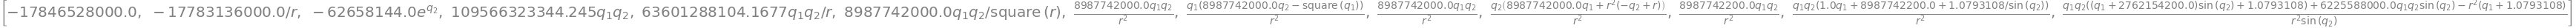

In [114]:
regression_data = pd.read_csv("outputs/20250416_233537_70427t/hall_of_fame.csv")

#print(regression_data)

exprs = [ sympy.sympify(regression_data.iloc[i, 2]).simplify() for i in range(13) ]

from IPython.display import display
display(exprs)
